# 6.4 Supervised Machine Learning Regression

#### 1. Importing libraries and data

#### 2. Data cleaning

####  3. Data preparation for regression analysis

####  4. Regression analysis

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Ensuring the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
path = r'/Users/stadtsalat/Documents/Boat Sales'

In [5]:
# Importing the latest data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_6_3.csv'))

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,Price_in_Euro,Country,City,Pricing Category
0,0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva,Low price
1,1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,Low price
2,2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg,Low price
3,3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,Low price
4,4,6,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3636,Switzerland,Neuenburgersee,Low price


### 2. Data cleaning

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type',
       'Year Built', 'Length', 'Width', 'Material', 'Views last 7 days',
       'Price_in_Euro', 'Country', 'City', 'Pricing Category'],
      dtype='object')

In [8]:
# Dropping the two redundant columns
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis = 1)

In [9]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,Price_in_Euro,Country,City,Pricing Category
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva,Low price
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,Low price
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg,Low price
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,Low price
4,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3636,Switzerland,Neuenburgersee,Low price


In [10]:
# Checking for missing values
df.isnull().sum()

Boat Type            0
Manufacturer         0
Type                 0
Year Built           0
Length               0
Width                0
Material             0
Views last 7 days    0
Price_in_Euro        0
Country              0
City                 0
Pricing Category     0
dtype: int64

No missing values

In [11]:
# Checking for duplicates
dups = df.duplicated()

In [12]:
dups.shape

(9241,)

No duplicates

### Extreme value check

In [ ]:
The values i choose to check are Length and Price of the boats 

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

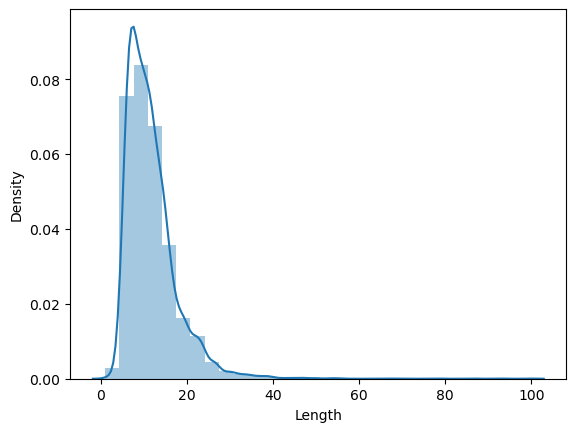

In [13]:
# Checking for extreme values
sns.distplot(df['Length'], bins=30)

In [15]:
# Checking the mean
df['Length'].mean()

11.71705226707066

In [16]:
# Checking the median
df['Length'].median()

10.5

In [17]:
# Checking the max
df['Length'].max()

100.0

####  3. Data preparation for regression analysis
  


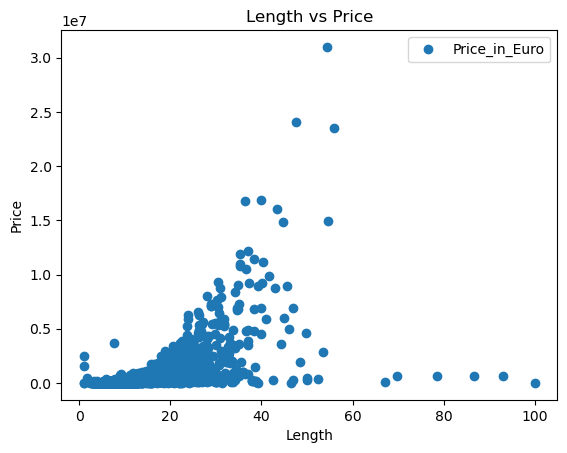

In [18]:
# Creating a scatterplot 

df.plot(x = 'Length', y='Price_in_Euro',style='o') 
plt.title('Length vs Price')  
plt.xlabel('Length')  
plt.ylabel('Price')  
plt.show()

### Hypothesis- If a boat is longer, then it is more exxpensive


In [19]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = df['Length'].values.reshape(-1,1)
y = df['Price_in_Euro'].values.reshape(-1,1)

In [21]:
X

array([[4.  ],
       [4.  ],
       [3.  ],
       ...,
       [4.4 ],
       [4.37],
       [3.6 ]])

In [22]:
y

array([[3370],
       [3490],
       [3367],
       ...,
       [4499],
       [4300],
       [3817]])

In [23]:
# Spliting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [25]:
 # Create a regression object.

regression = LinearRegression()

In [26]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

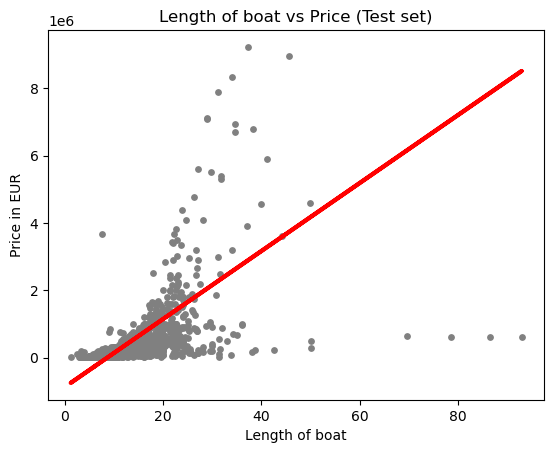

In [28]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length of boat vs Price (Test set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [30]:
# Printing the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[100893.06375611]]
Mean squared error:  355630610043.65405
R2 score:  0.17662716650640964


The slope of the regression model is 100893.06375611 and it is positive. The mean squared error (MSE) is 355630610043.65405 and the coefficient of determination (R2 score) is 0.17662716650640964.

- These results indicate that the linear relationship between the variables is weak. 
- The MSE is relatively high, indicating that the model does not capture a significant amount of the variance between the variables. 
- The low R2 score confirms that the model is weak and only explains a small portion of the variance.

In [31]:
y_predicted

array([[-270374.03548463],
       [ 244180.58967155],
       [  84769.54893689],
       ...,
       [1602201.22782881],
       [ 538788.33583939],
       [-254231.14528365]])

In [36]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,52900,-2.703740e+05
1,40000,2.441806e+05
2,275445,8.476955e+04
3,112000,2.401449e+05
4,696881,6.427082e+05
5,249000,5.932706e+05
6,69000,4.844805e+04
7,35990,-2.653294e+05
8,367000,5.145740e+05
9,449000,8.808158e+05


### Compare how the regression fits the training set

In [33]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[100893.06375611]]
Mean squared error:  712187465987.1533
R2 score:  0.33127759607281604


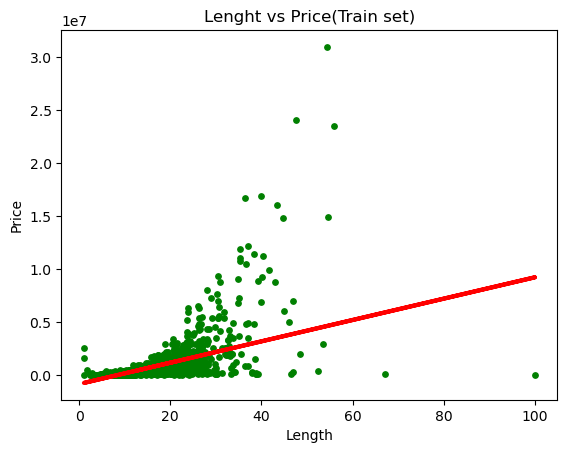

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Lenght vs Price(Train set)')
plot_test.xlabel('Length')
plot_test.ylabel('Price')
plot_test.show()

Comparing the two sets, it is clear that the training set has a higher R2 score and a lower MSE, indicating that it is a more reliable predictor of the relationship between the independent and dependent variables. The higher R2 score suggests that the training set explains more of the variance between the variables, while the lower MSE indicates that the set is a more accurate predictor.

It is evident that the length of a boat is not a reliable indicator of its cost, as there are several other important factors that affect the value of a boat. These include the type of materials used, the craftsmanship, the age of the boat, the condition of the boat, any accessories or features included, and the current market value. All of these should be taken into account when determining the worth of a boat.